In [7]:
import pandas as pd
import numpy as np

np.set_printoptions(legacy='1.25')

df_user = pd.read_csv('data/users_interactions.csv')
df_shared = pd.read_csv('data/shared_articles.csv')

df_user.head()


,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [8]:
eventType = {
    'VIEW': 1,
    'LIKE': 2,
    'FOLLOW': 3,
    'BOOKMARK': 4,
    'COMMENT CREATED': 5
}

df_user['rating'] = df_user['eventType'].map(eventType)

df_user.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,rating
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,1
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,1
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,1
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN,3
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN,1


<Axes: xlabel='rating', ylabel='Count'>

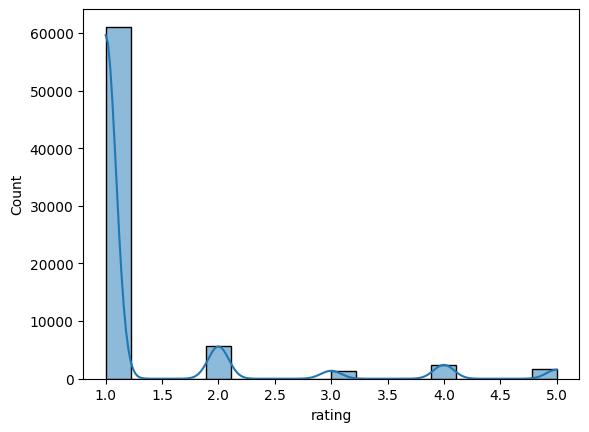

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
        
sns.histplot(data=df_user, x='rating', kde=True)
      

In [10]:
n_ratings = len(df_user)
n_content = len(df_user['contentId'].unique())
n_person = len(df_user['personId'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique contentId's: {n_content}")
print(f"Number of unique people: {n_person}")
print(f"Average ratings per person: {round(n_ratings/n_person, 2)}")
print(f"Average ratings per content: {round(n_ratings/n_content, 2)}")

Number of ratings: 72312
Number of unique contentId's: 2987
Number of unique people: 1895
Average ratings per person: 38.16
Average ratings per content: 24.21


In [11]:
df_user['contentId'].value_counts()

contentId
-4029704725707465084    433
-133139342397538859     315
 8657408509986329668    294
-6783772548752091658    294
-6843047699859121724    281
                       ... 
-7108012586837980940      1
 7526977287801930517      1
-282629989972409543       1
-6468782714472551646      1
-9040419159428373932      1
Name: count, Length: 2987, dtype: int64

In [12]:
print('Min:\t\t', df_user['contentId'].value_counts().min())
print('Quartile 1:\t', df_user['contentId'].value_counts().quantile(.25))
print('Median:\t\t', df_user['contentId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_user['contentId'].value_counts().quantile(.75))
print('Max:\t\t', df_user['contentId'].value_counts().max())

Min:		 1
Quartile 1:	 6.0
Median:		 14.0
Quartile 3:	 30.0
Max:		 433


In [13]:
# Store the count of ratings for each movie
value_counts = df_user['contentId'].value_counts()

# Make a list of those with more than 9 ratings
keep_list = value_counts[value_counts >= 30]
print(len(keep_list), 'content with 30 or more ratings\n')

keep_list

766 content with 30 or more ratings



contentId
-4029704725707465084    433
-133139342397538859     315
 8657408509986329668    294
-6783772548752091658    294
-6843047699859121724    281
                       ... 
 5088013394045185972     30
-3552937095886146934     30
-6726685468116057064     30
 7529823674661315431     30
 7804826445069770894     30
Name: count, Length: 766, dtype: int64

In [14]:
df_user = df_user.loc[df_user['contentId'].isin(keep_list.index)]
print(df_user.shape)
print("Ratings per post:\t", df_user.shape[0]/len(keep_list))
      

(47837, 9)
Ratings per post:	 62.45039164490861


In [15]:
print(f"Duplicate ratings: {df_user.duplicated(subset=['personId', 'contentId']).sum()}")

Duplicate ratings: 22824


In [16]:
print(f'Total rows before dropping duplicates: {df_user.shape[0]}')
        
# keep='last' if you want to keep the last record
# keep=False if you want to drop all duplicates
df_user.drop_duplicates(subset=['personId', 'contentId'], keep='first', inplace=True)

# These print statements are just a 'sanity check' to make sure we truly didn't have duplicates
print(f'Total rows after dropping duplicates: {df_user.shape[0]}')


Total rows before dropping duplicates: 47837
Total rows after dropping duplicates: 25013


In [17]:
df_user.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,rating
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,1
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,1
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN,3
5,1465413742,VIEW,310515487419366995,-8763398617720485024,1395789369402380392,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,MG,BR,1
7,1465415066,VIEW,-1492913151930215984,4254153380739593270,8743229464706506141,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,1


In [18]:
print(df_user['contentId'].isin(df_shared.index).sum())  # Shows how many matches there are


0


In [19]:
print(df_shared.index.name)  # If this prints 'contentId', it's the index


None


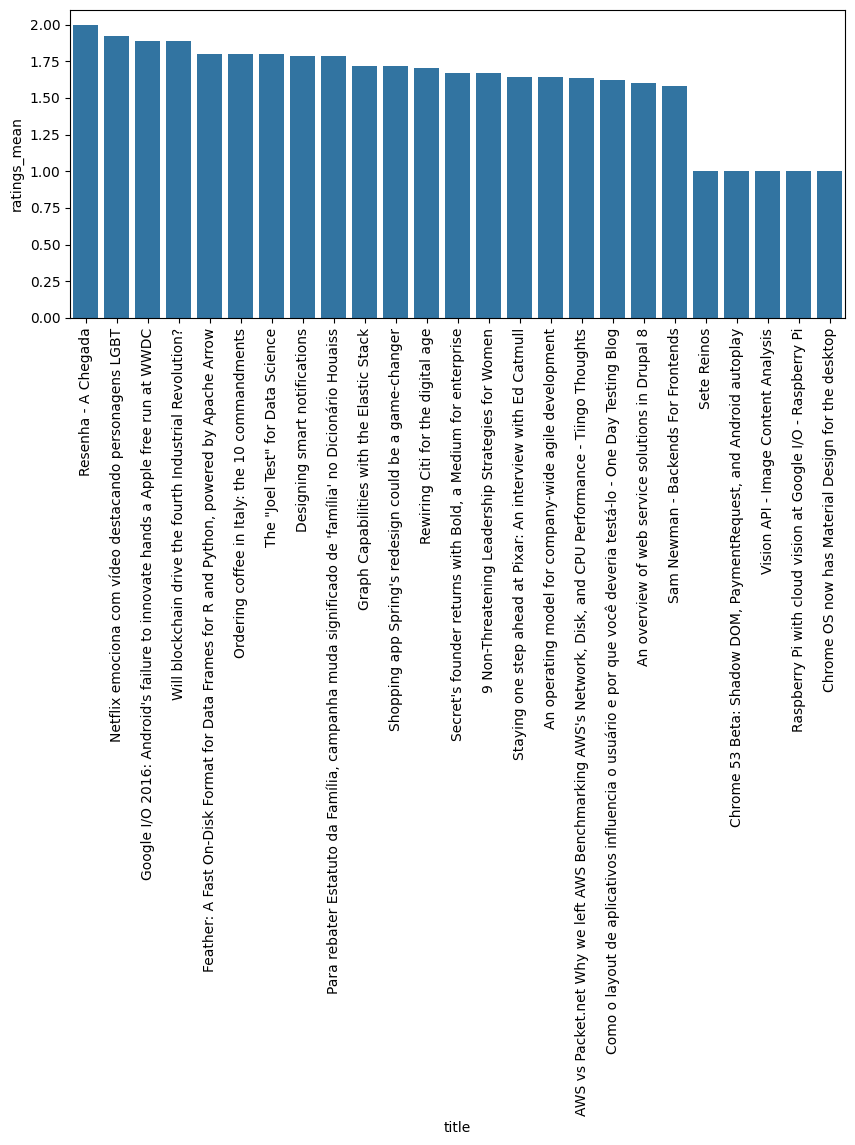

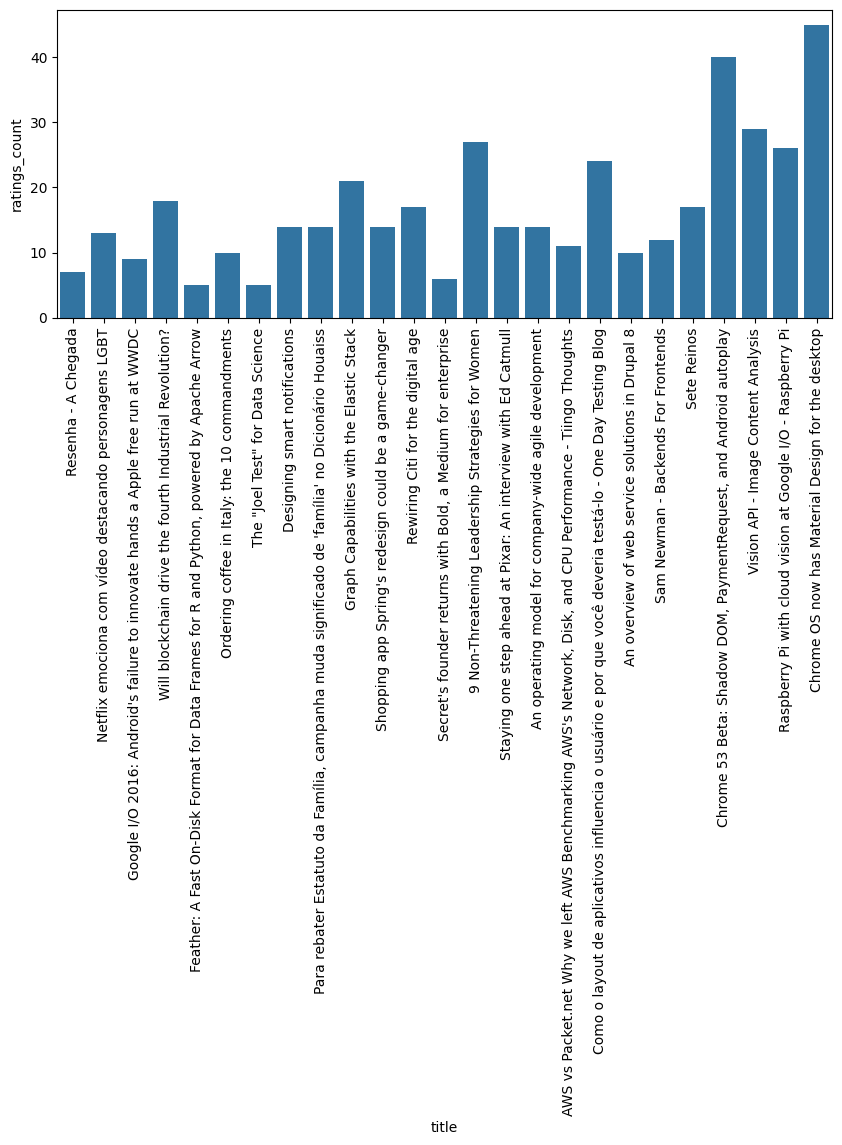

In [20]:
# Group the rows into individual titles and calculate the mean rating for each row
content_stats = df_user.groupby(by=['contentId'])[['rating']].agg(['count', 'mean'])
content_stats.columns = ['ratings_count', 'ratings_mean'] # Rename the columns to simplify the index

# Join with df_movies to get the titles
content_stats = content_stats.join(df_shared.set_index('contentId')['title'])
# content_stats = content_stats.join(df_shared['title'])

# Sort the ratings
content_stats = content_stats.sort_values(by=['ratings_mean'], ascending=False)

# Create a smaller dataset of the top n and bottom n rated movies
df_reduced = pd.concat([content_stats.head(20), content_stats.tail(5)])

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_mean')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_count')
plt.xticks(rotation=90)
plt.show()

In [21]:
import numpy as np
from scipy.sparse import csr_matrix

U = df_user['personId'].nunique()   # Number of users for the matrix
I = df_user['contentId'].nunique()  # Number of items for the matrix

# Map user and movie IDs to matrix indices
user_mapper = dict(zip(np.unique(df_user['personId']), list(range(U))))
item_mapper = dict(zip(np.unique(df_user['contentId']), list(range(I))))

# Map maxtrix indices back to IDs
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_user['personId'])))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_user['contentId'])))

# Create a list of index values for the csr_matrix for users and movies
user_index = [user_mapper[i] for i in df_user['personId']]
item_index = [item_mapper[i] for i in df_user['contentId']]

# Build the final matrix which will look like: (movieId, userId) rating
X = csr_matrix((df_user['rating'], (item_index, user_index)), shape=(I, U))

# Print each item out to see how they all work together.
# Each object is used to create the next object.
# We don't have to print these out; this is just to help you understand.
print(f'Number of users: {U}')
print(f'Number of items: {I}')
print(f'user_mapper:\t {len(user_mapper.keys())}   keys:values {user_mapper}')
print(f'item_mapper:\t {len(item_mapper.keys())}  keys:values {item_mapper}')
print(f'user_index:\t {len(user_index)} values\t   {user_index}')
print(f'item_index:\t {len(item_index)} values\t   {item_index}')
print(f'user_inv_mapper: {len(user_inv_mapper.keys())}   keys:values {user_inv_mapper}')
print(f'item_inv_mapper: {len(item_inv_mapper.keys())}  keys:values {item_inv_mapper}')
print(f'X: {X}')

Number of users: 1804
Number of items: 766
user_mapper:	 1804   keys:values {-9223121837663643404: 0, -9212075797126931087: 1, -9207251133131336884: 2, -9199575329909162940: 3, -9196668942822132778: 4, -9188188261933657343: 5, -9172914609055320039: 6, -9156344805277471150: 7, -9150583489352258206: 8, -9120685872592674274: 9, -9109785559521267180: 10, -9099478998637725255: 11, -9083704948999852989: 12, -9063420486253202900: 13, -9060214117327732109: 14, -9048557723087354030: 15, -9047547311469006438: 16, -9016528795238256703: 17, -9012030317377670760: 18, -9009798162809551896: 19, -9001583565812478106: 20, -8994220765455693336: 21, -8985529623369322698: 22, -8984152171875293281: 23, -8965597312806628567: 24, -8965390025652957482: 25, -8961797610770561652: 26, -8909668725653743114: 27, -8891033171626175843: 28, -8860671864164757449: 29, -8859417914913317336: 30, -8854674432071487111: 31, -8853658195208337106: 32, -8845298781299428018: 33, -8830250090736356260: 34, -8823950498314351783: 3

In [22]:
def create_matrix(df, user, item, rating):
    import numpy as np
    from scipy.sparse import csr_matrix
    
    U = df[user].nunique()  # Number of users for the matrix
    I = df[item].nunique()  # Number of items for the matrix
    
    # Map user and movie IDs to matrix indices
    user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
    item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

    # Map matrix indices back to IDs
    user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
    item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))
    
    # Create a list of index values for the csr_matrix for users and movies
    user_index = [user_mapper[i] for i in df[user]]
    item_index = [item_mapper[i] for i in df[item]]
    
    # Build the final matrix which will look like: (movieId, userId) rating
    X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))
    
    return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [23]:
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_user, 'personId', 'contentId', 'rating')
        
print(X) 
print(user_mapper)
print(user_inv_mapper)
print(item_mapper)
print(item_inv_mapper)

  (0, 17)	1
  (0, 20)	1
  (0, 29)	1
  (0, 33)	1
  (0, 66)	1
  (0, 98)	1
  (0, 112)	1
  (0, 122)	1
  (0, 191)	1
  (0, 271)	1
  (0, 384)	1
  (0, 497)	1
  (0, 537)	1
  (0, 601)	1
  (0, 621)	1
  (0, 641)	1
  (0, 713)	1
  (0, 751)	1
  (0, 762)	1
  (0, 773)	1
  (0, 791)	1
  (0, 920)	1
  (0, 948)	1
  (0, 952)	1
  (0, 968)	1
  :	:
  (765, 227)	1
  (765, 290)	1
  (765, 293)	1
  (765, 384)	1
  (765, 751)	1
  (765, 762)	1
  (765, 863)	1
  (765, 928)	1
  (765, 1026)	1
  (765, 1082)	1
  (765, 1161)	1
  (765, 1186)	1
  (765, 1201)	1
  (765, 1253)	1
  (765, 1268)	1
  (765, 1277)	1
  (765, 1315)	2
  (765, 1336)	1
  (765, 1337)	1
  (765, 1452)	1
  (765, 1518)	1
  (765, 1646)	1
  (765, 1748)	1
  (765, 1784)	1
  (765, 1797)	1
{-9223121837663643404: 0, -9212075797126931087: 1, -9207251133131336884: 2, -9199575329909162940: 3, -9196668942822132778: 4, -9188188261933657343: 5, -9172914609055320039: 6, -9156344805277471150: 7, -9150583489352258206: 8, -9120685872592674274: 9, -9109785559521267180: 10, -90994

In [24]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
    from sklearn.neighbors import NearestNeighbors
    
    rec_ids = []                # Make a list for the recommended item IDs we'll get later
    item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
    item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function
    
    # Fit the clustering algorithm based on the user-item matrix X
    knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)
    
    # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
    rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
    rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
    rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
    rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself
    
    # We need to replace the recommended item indeces with their original item IDs
    for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
        rec_ids.append(item_inv_mapper[rec_indeces[i]])
        
    # It may help to see what this is. The distance list is first and the recommended item indeces are second
    if messages:
        print(f'List of recommended item indeces:\n{rec_indeces}\n')
        print(f'List of recommended item IDs:\n{rec_ids}\n')
        print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')
    
    # Return two lists: the original item IDs of the recommendations and their similarity scores
    return rec_ids, rec_distances
      

In [25]:
user_id = -9212075797126931087
k = 20

df_user_ratings = df_user[df_user['personId'] == user_id].sort_values(by=['rating'], ascending=False)
df_user_ratings = df_user_ratings.head(3)

df_results = pd.DataFrame(columns=['distance'])

for row in df_user_ratings.itertuples():
    rec_ids, rec_distance = recommend(row.contentId, X, item_mapper, item_inv_mapper, k=k)
    for i,  rec_id in enumerate(rec_ids):
        df_results.at[rec_id, 'distance'] = rec_distance[i]


df_results.sort_values(by=['distance'])
    

List of recommended item indeces:
[337 699 762 662 719 555 661 495 406 549 314 347 457 252 112 299 395 479
 289 387 486]

List of recommended item IDs:
[7521700660190108859, 9136323715291453594, 6817244649248188271, 8118799783881928573, 4084131344684656470, 6807042796917367736, 2708089973817733462, 660451400045043370, 3906974906788964502, -1573329182923097618, -759389978085260161, 1878784080584939832, -3302834510061927448, -6592496241044177853, -1995591062742965408, 374352050712569304, 2372438485070148864, -2382583983070627054, 139485217095648183, 2581138407738454418]

List of recommended item similarity to selected item:
[0.66223974 0.7504329  0.77485924 0.79187622 0.81228778 0.846607
 0.85333679 0.85415416 0.85997199 0.86082844 0.86768597 0.87521645
 0.87992697 0.88058371 0.88235294 0.88437568 0.88463435 0.88495525
 0.88495525 0.88566761]

List of recommended item indeces:
[299 400 289 341 186 718 752 579 321  42 318 571 759 665 755 367 195 418
   0 387 369]

List of recommended item

,distance
-4089455027188314262,0.499527
2262656830196923781,0.578125
2543311963908571128,0.584951
-307396946333196366,0.599691
1468327003955810686,0.611091
2362495898257544462,0.622036
-8279505492976427918,0.622664
-7387185690512762935,0.625
3598164602856140626,0.630085
3075564241645350154,0.635978


In [26]:
k = 5
df_recommendations = pd.DataFrame(columns=['title'], index=item_mapper.keys())
df_shared.set_index('contentId', inplace=True)

for row in df_recommendations.itertuples():
    content_id = row.Index  # Getting the movie ID from the index
    if content_id not in df_shared.index:
        continue  # Skip if movie_id is not in df_movies
    
    rec_ids, rec_distance = recommend(content_id, X, item_mapper, item_inv_mapper, k=k, messages=False)
    
    df_recommendations.at[content_id, 'title'] = df_shared.at[content_id, 'title']
    
    for i, rec_id in enumerate(rec_ids):
        if rec_id in df_shared.index:  # Ensure recommended ID exists in df_movies
            df_recommendations.at[content_id, f'Recommendation {i + 1}'] = df_shared.at[rec_id, 'title']

df_recommendations


,title,Recommendation 1,Recommendation 2,Recommendation 3,Recommendation 4,Recommendation 5
-9192549002213406534,Chrome OS now has Material Design for the desktop,Alecrim/AlecrimCoreData,Acesse a versão Material Design do YouTube | G...,Calm down: Google's use of Material Design on ...,Progressive Web App - first introduced on Goog...,Benchmarks for the Top Server-Side Swift Frame...
-9189659052158407108,Eddy Cue and Craig Federighi Open Up About Lea...,Resenha - A Chegada,How to Design a Walkthrough That Users Will Read,Introduction · Bitcoin para Programadores,You don't talk about refactoring club,The code that took America to the moon was jus...
-9176143510534135851,Livraria dá adeus a estoque e imprime livros n...,Up your app's sharing game with DirectShare - ...,The barbell effect of machine learning.,How Mark Zuckerberg Led Facebook's War to Crus...,Lists are the new search,This Super Accurate Portrait Selection Tech Us...
-9160910454530522563,"Apple's new file manager, APFS, is awesome",A New Number Format for Computers Could Nuke A...,The End Of Apple Man,CSS Containment in Chrome 52 | Web Updates - G...,Our password hashing has no clothes,Microsoft expands its support for Docker conta...
-9128741757954228992,Confirmed: Walmart buys Jet.com for $3B in cash,How enterprise architects can help ensure succ...,Artificial intelligence produces realistic sou...,A step-by-step guide to agile growth experiments,Two Different Sales Motions . . . .,2 terrific #MarTech talks on the rise of AI in...
...,...,...,...,...,...,...
9079880752026843473,Design Better Forms - uxdesign.cc - User Exper...,UX ou UI?,Ubuntu recebe suporte ao React Native e aplica...,Labelling automated builds on Docker Hub - Mic...,Leveling Up Your JavaScript -,Workshop de Design Thinking - Unicamp
9136323715291453594,How to Improve 8 Major Problem Areas for Japan...,Learn Hiragana: The Ultimate Guide,Bayer anuncia compra da Monsanto por US$ 66 bi...,Aplicativos do Android agora podem reagir com ...,Hacked Website Report - 2016/Q3,Evernote anuncia integração com Google Drive |...
9175693555063886126,15 minutos sobre Docker,How to build cross-platform mobile apps using ...,Introduction · Bitcoin para Programadores,Mastering Bash and Terminal,Contêiner do Windows no Windows 10,Most Interesting APIs in 2016: Cognitive Compu...
9215261273565326920,"Meet Mycroft, the open source AI who wants to ...",Making open source data more available,The barbell effect of machine learning.,WWDC 2016 preview: How to watch &amp; what to ...,Lists are the new search,This Super Accurate Portrait Selection Tech Us...


In [27]:
df_recommendations.to_csv("models/collab_recs_full.csv", index=False)

Content Filtering

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


df = pd.read_csv('data/shared_articles.csv')
df_users = pd.read_csv('data/users_interactions.csv')

In [29]:
print(df.shape)
df.isna().sum()

(3122, 13)


timestamp             0
eventType             0
contentId             0
authorPersonId        0
authorSessionId       0
authorUserAgent    2442
authorRegion       2442
authorCountry      2442
contentType           0
url                   0
title                 0
text                  0
lang                  0
dtype: int64

In [30]:
df['authorUserAgent'].fillna('unknown', inplace=True)
df['authorRegion'].fillna('unknown', inplace=True)
df['authorCountry'].fillna('unknown', inplace=True)

/var/folders/24/zdcgvn4s21x0mlfy68b1rh880000gn/T/ipykernel_76857/2349981157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['authorUserAgent'].fillna('unknown', inplace=True)
/var/folders/24/zdcgvn4s21x0mlfy68b1rh880000gn/T/ipykernel_76857/2349981157.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [31]:
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()[:100]))  # Use only first 500 word

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
          
# Create a TfidfVectorizer and Remove stopwords
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the data to a tfidf matrix
tfidf_matrix = tfidf.fit_transform(df['text'])

# Print the shape of the tfidf_matrix
print(tfidf_matrix.shape)

# Preview the matrix by placing it into a DataFrame (which we won't need later)
df_tfidf = pd.DataFrame(tfidf_matrix.T.todense(), index=tfidf.get_feature_names_out(), columns=df['text'])
df_tfidf.iloc[2221:2226]

(3122, 26428)


text,"All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that have tarnished Bitcoin. Many Bitcoin advocates say Ethereum will face more security problems than Bitcoin because of the greater complexity of the software. Thus far, Ethereum has faced much less testing, and many fewer attacks, than Bitcoin. The novel design of Ethereum may also invite intense scrutiny by authorities given that potentially fraudulent contracts, like the Ponzi schemes, can be written directly into the Ethereum system.","All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that have tarnished Bitcoin. Many Bitcoin advocates say Ethereum will face more security problems than Bitcoin because of the greater complexity of the software. Thus far, Ethereum has faced much less testing, and many fewer attacks, than Bitcoin. The novel design of Ethereum may also invite intense scrutiny by authorities given that potentially fraudulent contracts, like the Ponzi schemes, can be written directly into the Ethereum system.","The alarm clock wakes me at 8:00 with stream of advert-free broadcasting, charged at one satoshi per second. The current BTC exchange rate makes that snooze button a costly proposition! So I get up, make coffee and go to my computer to check the overnight performance of my bots. TradeBot earns me on Trump and Branson TradeBot, which allocates funds between the main chain and various national currency side-chains, generated a lucrative 0.24 BTC return. TradeBot has been reliably profitable ever since I set it to trade USDcoin according to political prediction market data. As expected, the latest poll numbers","We're excited to share the Google Data Center 360° Tour - a YouTube 360° video that gives you an unprecedented and immersive look inside one of our data centers. There are several ways to view this video: On desktop using Google Chrome use your mouse or trackpad to change your view while the video plays YouTube app on mobile - move your device around to look at all angles while the video plays And the most immersive way to view - using Google Cardboard (currently supported by the Android YouTube app only, iOS support is coming soon!) Load the video","The Aite Group projects the blockchain market could be valued at $400 million by 2019. For that reason, some of the biggest names in banking, industry and technology have entered into the space to evaluate how this technology could change the financial world. IBM and Linux, for instance, have brought together some of the brightest minds in the industry and technology to work on blockchain technology through the Hyperledger Project. The Hyperledger Project is under the umbrella of the Linux Foundation, and seeks to incorporate findings by blockchain projects such as Blockstream, Ripple, Digital Asset Holdings and others in order","One of the largest and oldest organizations for computing professionals will kick off its annual conference on the future of mobile cloud computing tomorrow, where blockchain is scheduled to be one of the attractions. With more than 421,000 members in 260 countries, the Institute of Electrical and Electronics Engineers (IEEE) holding such a high-profile event has the potential to accelerate the rate of blockchain adoption by the engineering community. At the four-day conference, beginning Tuesday, the IEEE will host five blockchain seminars at the 702-year-old Exeter College of Oxford. The conference, IEEE Mobile Cloud 2016, is the organization's fourth annual","It will take time until banks come around to the idea of embracing Bitcoin or Fintech, though. Banks need to innovate at an accelerated pace, yet are unable to do so on their own. Allowing third-party developers to work together with the bank 

In [33]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity between each movie description
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# For easier viewing, put it in a dataframe
pd.DataFrame(cosine_sim)
      

,0,1,2,3,4,5,6,7,8,9,...,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121
0,1.000000,1.000000,0.000000,0.000000,0.005113,0.000000,0.089598,0.038557,0.090866,0.354951,...,0.036128,0.009900,0.000000,0.005159,0.000000,0.000000,0.000000,0.000000,0.023797,0.000000
1,1.000000,1.000000,0.000000,0.000000,0.005113,0.000000,0.089598,0.038557,0.090866,0.354951,...,0.036128,0.009900,0.000000,0.005159,0.000000,0.000000,0.000000,0.000000,0.023797,0.000000
2,0.000000,0.000000,1.000000,0.007271,0.007374,0.010998,0.013952,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.010049,0.000000,0.000000,0.000000,0.000000,0.021004,0.000000,0.009790
3,0.000000,0.000000,0.007271,1.000000,0.007569,0.011239,0.000000,0.010168,0.020640,0.017575,...,0.105936,0.003770,0.000000,0.011057,0.007823,0.000000,0.182026,0.022940,0.030696,0.000000
4,0.005113,0.005113,0.007374,0.007569,1.000000,0.077590,0.023827,0.114568,0.033065,0.009360,...,0.000000,0.024088,0.011844,0.054671,0.000000,0.000000,0.010184,0.005003,0.047345,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004137,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.028851,0.000000
3118,0.000000,0.000000,0.000000,0.182026,0.010184,0.012263,0.000000,0.027481,0.014788,0.020886,...,0.070807,0.051688,0.007753,0.021579,0.008535,0.000000,1.000000,0.008965,0.002638,0.007166
3119,0.000000,0.000000,0.021004,0.022940,0.005003,0.018208,0.036885,0.000000,0.018595,0.000000,...,0.005839,0.012534,0.024588,0.010607,0.033312,0.000000,0.008965,1.000000,0.003915,0.091432
3120,0.023797,0.023797,0.000000,0.030696,0.047345,0.024971,0.024524,0.038197,0.039451,0.030235,...,0.002828,0.012797,0.009850,0.000000,0.007508,0.028851,0.002638,0.003915,1.000000,0.012452


In [34]:
import pandas as pd

def get_all_recommendations(df, sim_matrix, n=5, output_file="models/content_recs_full.csv"):
    all_recommendations = []
    
    for item_id in range(len(df)):
        if item_id >= len(sim_matrix):  # Ensure item_id is within bounds
            continue

        # Get similarity scores for the item
        sim_scores = list(enumerate(sim_matrix[item_id]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        top_similar = [pair for pair in sim_scores[1:n+1] if pair[1] < 1]  # Skip itself if score == 1
        
        # Store results in a structured format
        recommendations = [df.loc[rec_id, "title"] for rec_id, score in top_similar]
        while len(recommendations) < n:
            recommendations.append("")  # Ensure exactly n columns
        
        all_recommendations.append([df.loc[item_id, "title"]] + recommendations)
    
    # Convert to DataFrame and save to CSV
    column_names = ["Title"] + [f"Recommendation {i+1}" for i in range(n)]
    rec_df = pd.DataFrame(all_recommendations, columns=column_names)
    rec_df.to_csv(output_file, index=False)
    
    print(f"Final recommendations saved to {output_file}")
    return rec_df

# Run the function
recommendations_df = get_all_recommendations(df, cosine_sim)


Final recommendations saved to models/content_recs_full.csv
